# **Task 4: Classification with Logistic Regression.**
- **Objective: Build a binary classifier using logistic regression.** 
- **Tools:  Scikit-learn, Pandas, Matplotlib**

### **1.Choose a binary classification dataset.**

In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data.csv")

# Drop unnecessary columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Convert diagnosis to binary (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Display first 5 rows
print(df.head())

# Check info and target distribution
print(df.info())
print(df['diagnosis'].value_counts())


   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

### **2.Train/test split and standardize features.**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target (assuming 'target' is the target column)
X = df.drop('diagnosis', axis=1)  # Replace with actual target column
y = df['diagnosis']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### **3.Fit a Logistic Regression model.**

In [11]:
from sklearn.linear_model import LogisticRegression

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)


### **4.Evaluate with confusion matrix, precision, reca l, ROC-AUC.**

Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC-AUC Score: 0.99737962659679


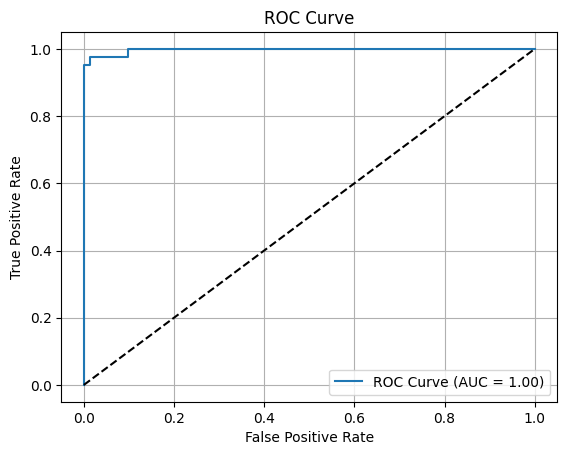

In [12]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Precision and Recall
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# ROC-AUC
y_proba = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


### **5.Tune threshold and explain sigmoid function.**

Confusion Matrix (threshold=0.6):
 [[71  0]
 [ 2 41]]
Precision: 1.0
Recall: 0.9534883720930233


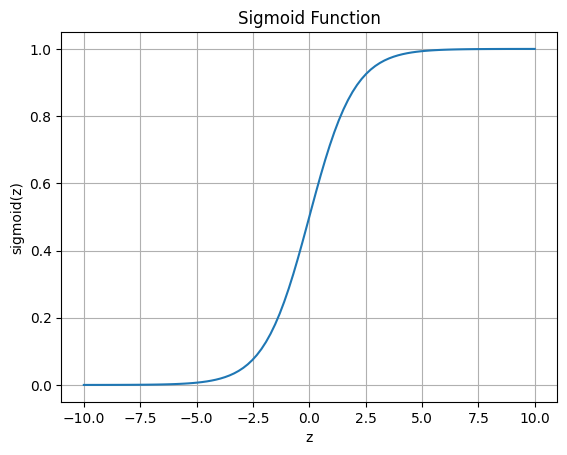

In [13]:
import numpy as np

# Tune threshold manually
threshold = 0.6  # Example threshold
y_pred_threshold = (y_proba >= threshold).astype(int)

# Evaluate with new threshold
print("Confusion Matrix (threshold=0.6):\n", confusion_matrix(y_test, y_pred_threshold))
print("Precision:", precision_score(y_test, y_pred_threshold))
print("Recall:", recall_score(y_test, y_pred_threshold))

# Sigmoid function explanation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plot sigmoid
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

plt.plot(z, sig)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()
